In [1]:
import os
import sys
sys.path.append("../..")

from pathlib import Path
import pandas as pd
from skfuzzy import control as ctrl
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

from src.rule_generation import *
from src.fuzzy_utils import *

In [12]:
TS_DATA_FILENAME = 'stock_data_part_10.csv'
FILE_PATH = Path.cwd().parent.parent / 'data' / TS_DATA_FILENAME


In [15]:
window_size = 2
num_fuzzy_sets = 3
metodo_defuzzificacao = defuzzificacao_centroid
operacao_intersecao = operacao_intersecao_min
operacao_implicacao = implicacao_prod

## Iniciando o sistema de inferência

In [ ]:
dic_operacoes_intersecao = {
    operacao_intersecao_min: "Mínimo",
    operacao_intersecao_prod: "Produto",
    operacao_intersecao_avg: "Média"
}

dic_implicacoes = {
    implicacao_min: "Mínimo",
    implicacao_maxmin: "Soma truncada",
    implicacao_prod: "Produto"
}

dic_defuzzificacao = {
    defuzzificacao_centroid: "Centro de Gravidade",
    defuzzificacao_mean_of_maxima: "Média dos Máximos",
    defuzzificacao_weighted_average: "Média Ponderada"
}

In [ ]:
window_size = 2
num_fuzzy_sets = 3
metodo_defuzzificacao = defuzzificacao_centroid
operacao_intersecao = operacao_intersecao_min
operacao_implicacao = implicacao_prod


In [ ]:
df = lags_create(window_size, FILE_PATH, 'Preço')

In [6]:
variable_list = create_fuzzy_variables(
    df, num_fuzzy_sets, metodo_defuzzificacao)

In [ ]:
# Divisão da base de dados (treino e teste)
train_df = df.iloc[:int(len(df) * 0.9)]
test_df = df.iloc[int(len(df) * 0.9):]

# Extração das regras fuzzy
fuzzy_system = create_fuzzy_system(
    train_df, variable_list, operacao_intersecao,operacao_implicacao, 1)

In [ ]:
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_system)

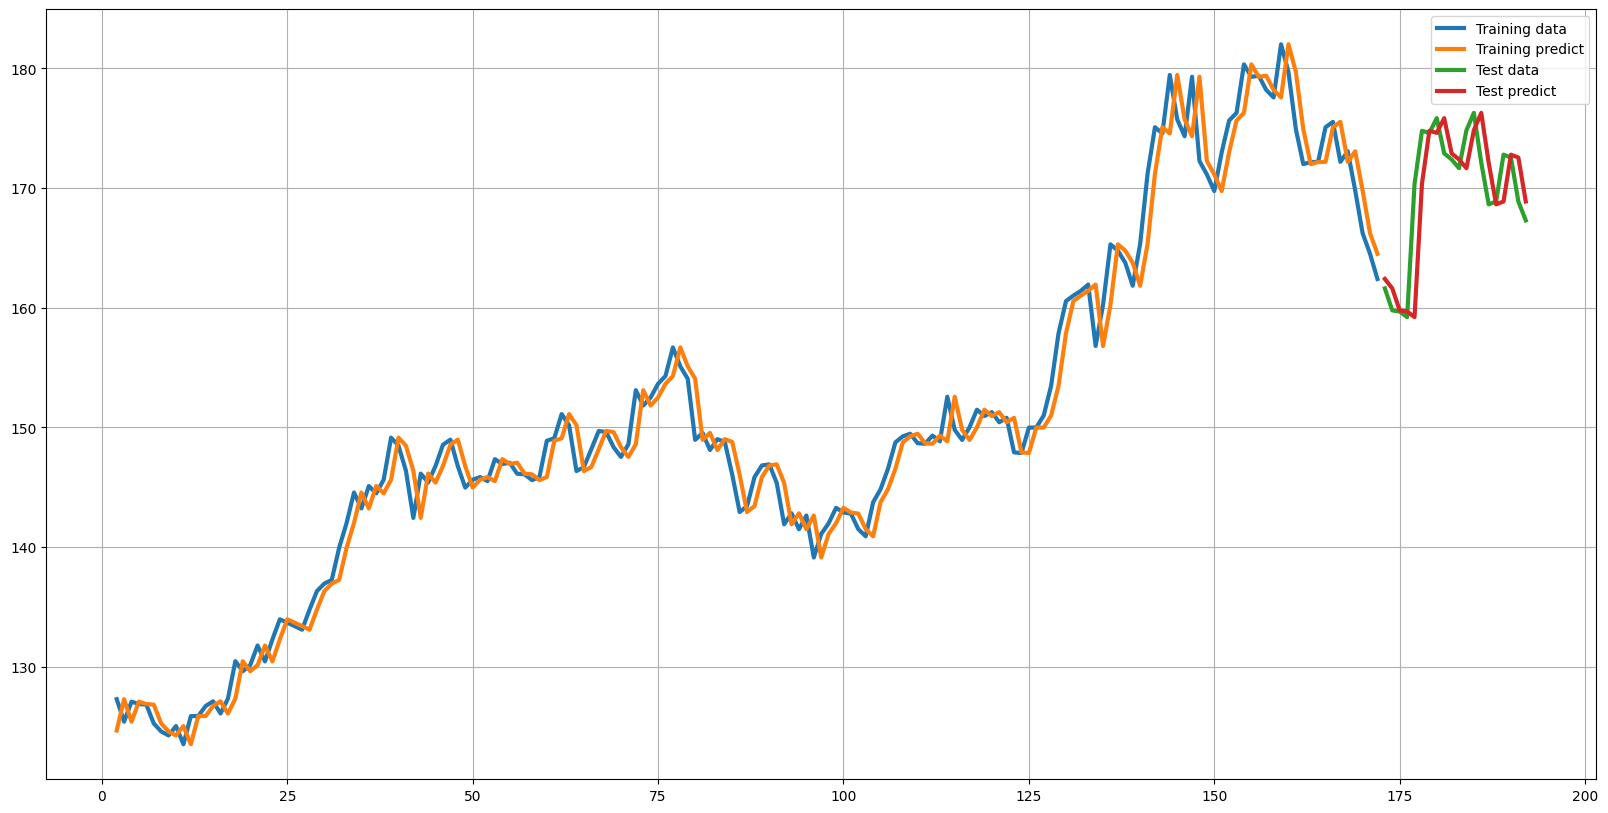

In [9]:
predict_train_df = predict(fuzzy_sim, train_df,metodo_defuzzificacao)

predict_test_df = predict(fuzzy_sim, test_df, metodo_defuzzificacao)


plt.figure(figsize=(20, 10))
plt.plot(predict_train_df['target'], label='Training data', linewidth=3)
plt.plot(predict_train_df['predict'], label='Training predict', linewidth=3)
plt.plot(predict_test_df['target'], label='Test data', linewidth=3)
plt.plot(predict_test_df['predict'], label='Test predict', linewidth=3)
plt.legend()
plt.grid()

plt.show()

In [10]:
mse_train, predict_train_df = avaliar_modelo(fuzzy_sim, train_df, metodo_defuzzificacao)
mse_test, predict_test_df = avaliar_modelo(fuzzy_sim, test_df, metodo_defuzzificacao)

print(f"{num_fuzzy_sets} conjuntos fuzzy com janela de {window_size} dias")
print(f"Método de defuzzificação: {dic_defuzzificacao[metodo_defuzzificacao]}")
print(f"Operação de interseção: {dic_operacoes_intersecao[operacao_intersecao]}")
print(f"Implicação: {dic_implicacoes[operacao_implicacao]}")
print(f"MSE Treino: {mse_train}")
print(f"MSE Teste: {mse_test}")

3 conjuntos fuzzy com janela de 2 dias
Método de defuzzificação: Centro de Gravidade
Operação de interseção: Mínimo
Implicação: Produto
MSE Treino: 4.64535126142471
MSE Teste: 11.569377908960451
